In [27]:
#stock predictions and forecasting using LSTM
import pandas as pd
import datetime
import numpy as np






In [18]:
df=pd.read_csv(r'C:\Users\sakth\Downloads\MSFT (1).csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060163,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062311,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063386,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061774,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060700,47894400
...,...,...,...,...,...,...,...
9638,2024-06-11,425.480011,432.820007,425.250000,432.679993,432.679993,14551100
9639,2024-06-12,435.320007,443.399994,433.250000,441.059998,441.059998,22366200
9640,2024-06-13,440.850006,443.390015,439.369995,441.579987,441.579987,15960600
9641,2024-06-14,438.279999,443.140015,436.720001,442.570007,442.570007,13582000


In [19]:
df=df[['Date','Close']]
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9638,2024-06-11,432.679993
9639,2024-06-12,441.059998
9640,2024-06-13,441.579987
9641,2024-06-14,442.570007


In [20]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9638    2024-06-11
9639    2024-06-12
9640    2024-06-13
9641    2024-06-14
9642    2024-06-17
Name: Date, Length: 9643, dtype: object

In [22]:
def string_to_datetime(x):
    split = x.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
date_obj=string_to_datetime(df['Date'][0])
date_obj

datetime.datetime(1986, 3, 13, 0, 0)

In [23]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9638,2024-06-11,432.679993
9639,2024-06-12,441.059998
9640,2024-06-13,441.579987
9641,2024-06-14,442.570007


In [24]:
df['Date']=df['Date'].apply(string_to_datetime) 
df['Date']

C:\Users\sakth\AppData\Local\Temp\ipykernel_10828\866467771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['Date'].apply(string_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9638   2024-06-11
9639   2024-06-12
9640   2024-06-13
9641   2024-06-14
9642   2024-06-17
Name: Date, Length: 9643, dtype: datetime64[ns]

In [25]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2024-06-11,432.679993
2024-06-12,441.059998
2024-06-13,441.579987


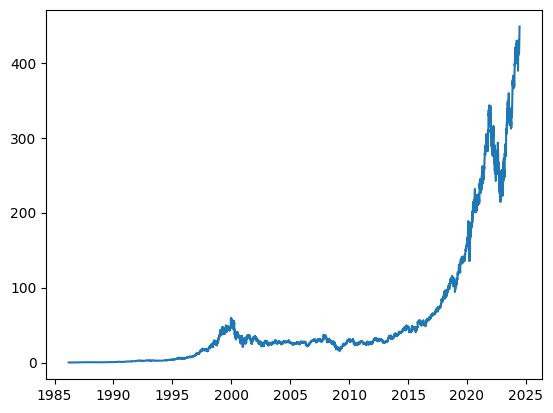

In [26]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['Close'])

In [30]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = string_to_datetime(first_date_str)
  last_date  = string_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [31]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

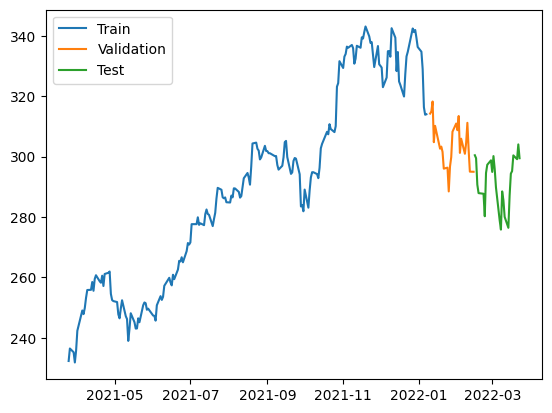

In [32]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100


7/7 [==============================] - 4s 116ms/step - loss: 84435.3516 - mean_absolute_error: 288.8341 - val_loss: 92053.0391 - val_mean_absolute_error: 303.3151
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 84087.2734 - mean_absolute_error: 288.2298 - val_loss: 91661.8281 - val_mean_absolute_error: 302.6696
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 83715.4297 - mean_absolute_error: 287.5842 - val_loss: 91284.0391 - val_mean_absolute_error: 302.0448
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 83359.6562 - mean_absolute_error: 286.9667 - val_loss: 90892.5625 - val_mean_absolute_error: 301.3960
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 82940.4609 - mean_absolute_error: 286.2343 - val_loss: 90348.0391 - val_mean_absolute_error: 300.4914
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 82365.6719 - mean_absolute_error: 285.2290 - val_loss: 8964

7/7 [==============================] - 1s 2ms/step


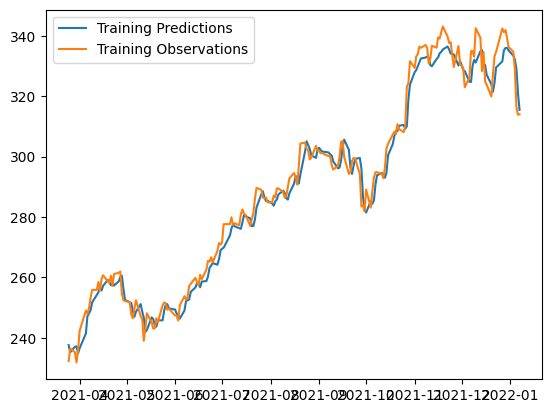

In [34]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 22ms/step


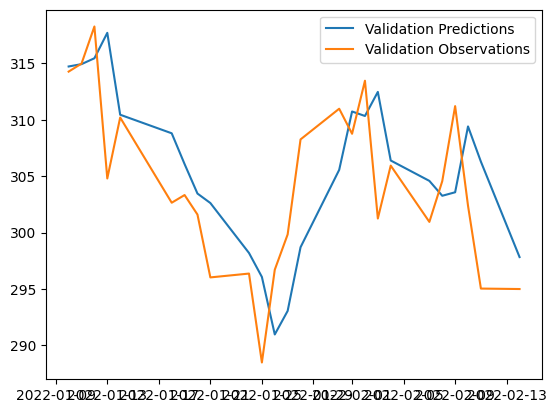

In [35]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 21ms/step


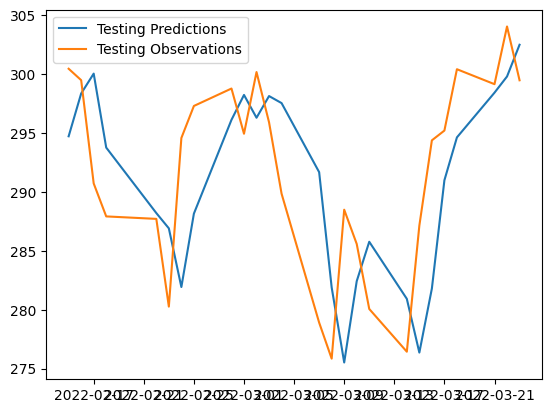

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

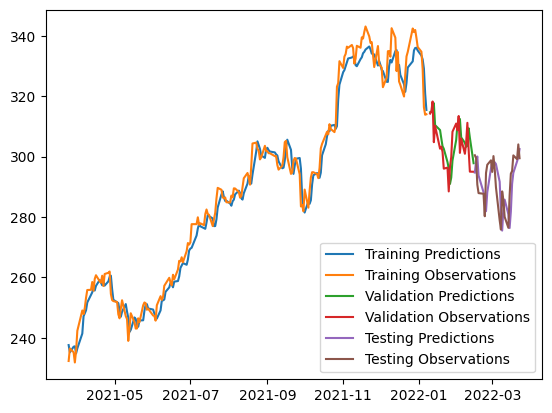

In [37]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [38]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 22ms/step


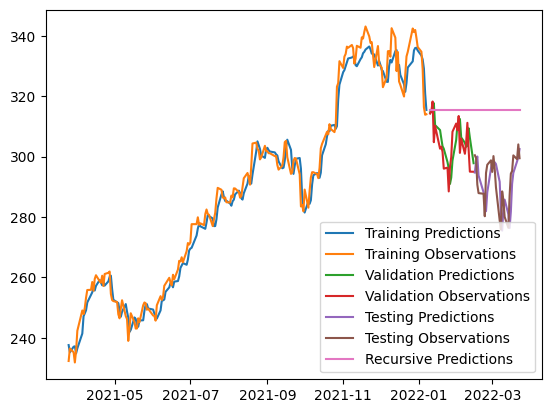

In [39]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

1/1 [==============================] - 0s 30ms/step


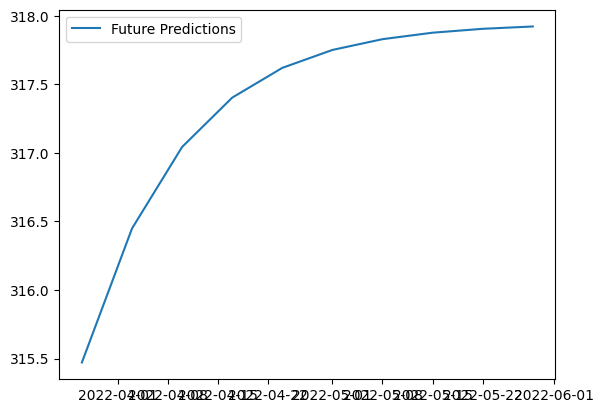

In [40]:
# Create a new dataframe to hold the future dates and predictions
future_dates_df = pd.DataFrame({'Date': pd.date_range(start='2022-03-24', periods=10, freq='W')})

# Convert the future dates to datetime objects
future_dates_df['Date'] = future_dates_df['Date'].apply(lambda x: x.to_pydatetime().date())

# Create a copy of the last window of the training data
last_window = deepcopy(X_train[-1])

# Initialize an empty list to store the future predictions
future_predictions = []

# Loop through the future dates
for date in future_dates_df['Date']:
  # Predict the next day's closing price
  next_prediction = model.predict(np.array([last_window])).flatten()

  # Append the prediction to the list
  future_predictions.append(next_prediction)

  # Update the last window with the predicted closing price
  last_window[-1] = next_prediction

# Add the future predictions to the dataframe
future_dates_df['Close'] = future_predictions

# Plot the future predictions
plt.plot(future_dates_df['Date'], future_dates_df['Close'])
plt.legend(['Future Predictions'])

In [43]:
predicted_price = model.predict(X_test)
for target_date, prediction in zip(recursive_dates, recursive_predictions):
  print(f"Date: {target_date}, Predicted Price: {prediction}")

1/1 [==============================] - 0s 29ms/step
Date: 2022-01-10 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-11 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-12 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-13 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-14 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-18 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-19 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-20 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-21 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-24 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-25 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-26 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-27 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-28 00:00:00, Predicted Price: [315.4714]
Date: 2022-01-31 00:00:00, Predicted Price: [315.4714]
Date: 2022-02-01 00:00:00, Predicted Price: [315.4714]
Date: 2022-02-02 00:00:00, Predicted Price: [315.4714]
Date: 2022-02